In [4]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15
import warnings 
warnings.filterwarnings(action='ignore')

In [5]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 데이터 탐색 및 전처리

- 1)train_lunch,train_dinner
- 2)test_lunch, test_dinner
- 3)전체합쳐진 데이터
- 총 6개 csv파일로 저장을 해두었다.

-하나의 데이터로해주면 되지만, 점도 직관적으로 보기위해 나누어줬다
-그리고 test에 'none'값을 없애주면 다른 행들도 사라지기 때문에 따로 나누어서 저장해준 뒤에 
-나중에 학습을 할때 'None'값만 없애주고 학습을 하기위해 데이터들을 나누어주었다.

-------------------------------------------------------------------

# 1))train_lunch,train_dinner

In [6]:
df = pd.read_csv('train.csv')
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [8]:
df.corr()
#중식계, 석식계가 상관관계가 있다(상관곤계가 있다고 인과관계는 될수없지만,
#점심에도 먹은 사람은 저녁에도 먹을 가능성이 크다고 생각. 점심때 밖에서 먹지 않은 사람들은 시간을 효율적으로 쓰고 싶어하거나
#음식에 대해 딱히 관심이 없을수도있다생각. 그냥 살기위해 먹는 사람들일수도 있다 생각.)

#그래서 이 사람들은 시간이 가장 중요하다 생각.
#그래도 너무 맛이없으면 밖에서 사먹을 수도 있다는게 두번째 가설. 보통 음식은 밥, 국 , 메인반찬이 중요하므로
#음식이 너무 맛이없지않는한 웬만하면 구내식당을 이용할거라 예측.

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


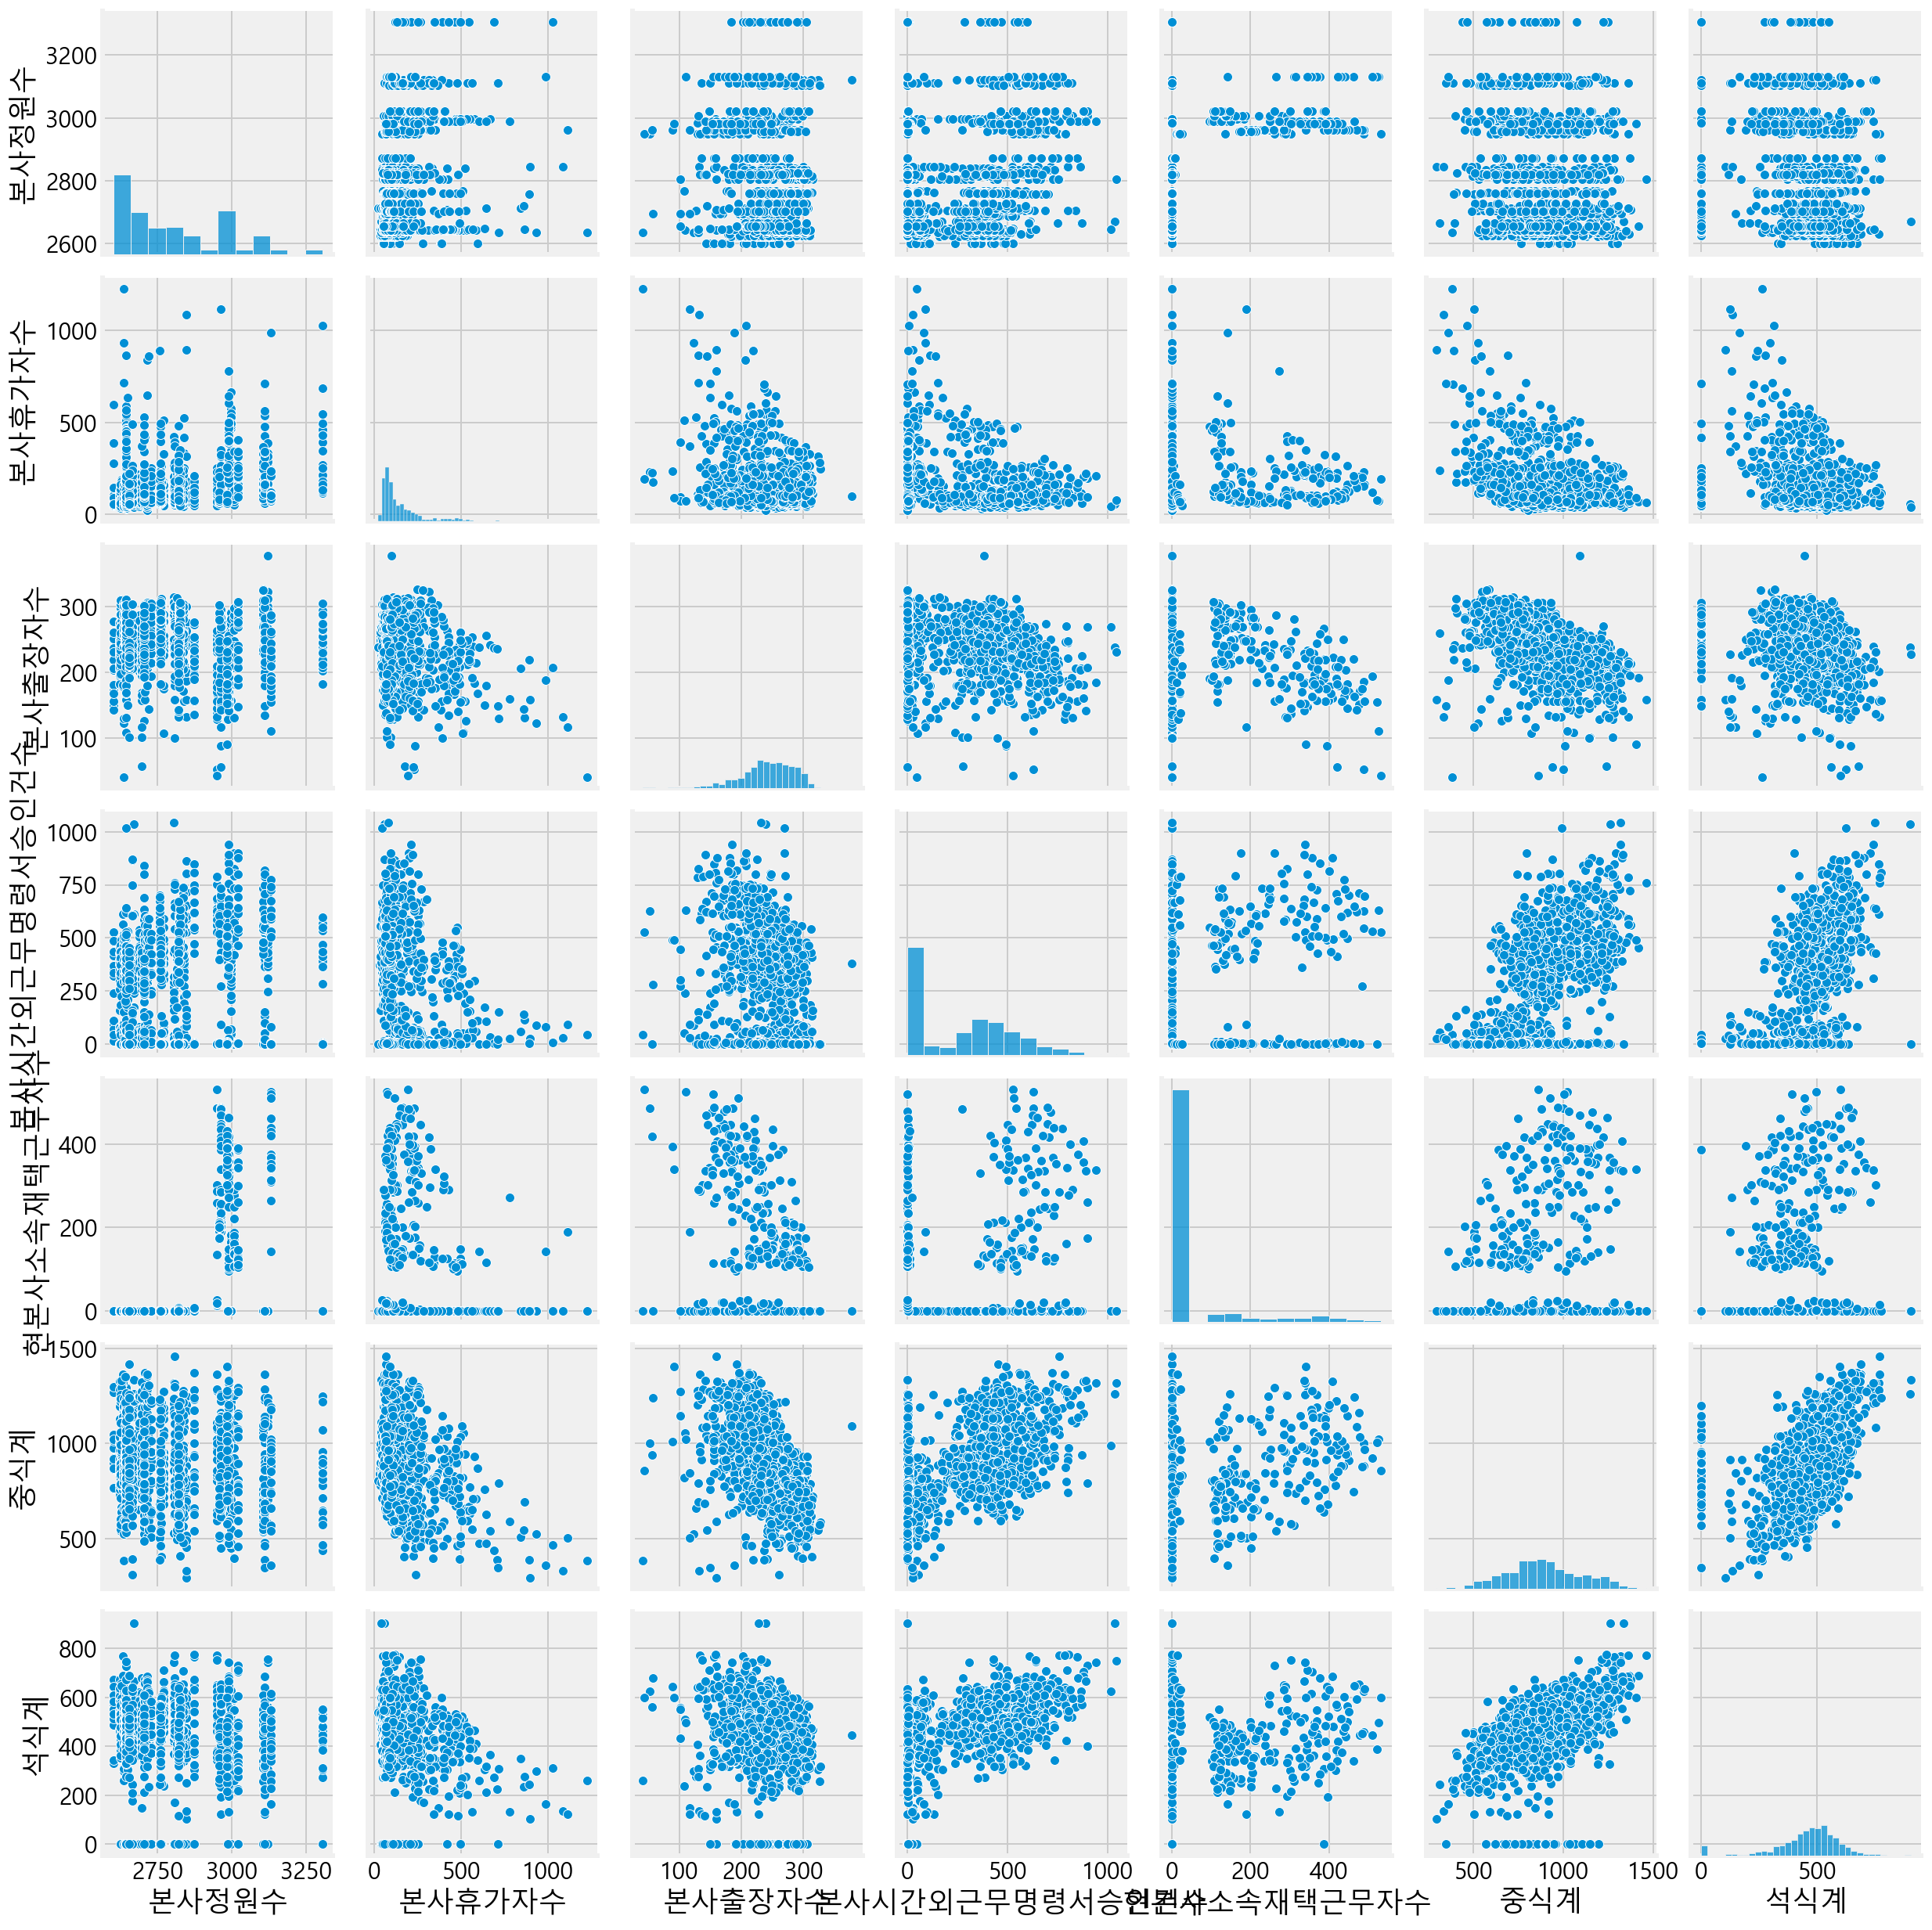

In [9]:
sns.pairplot(df)

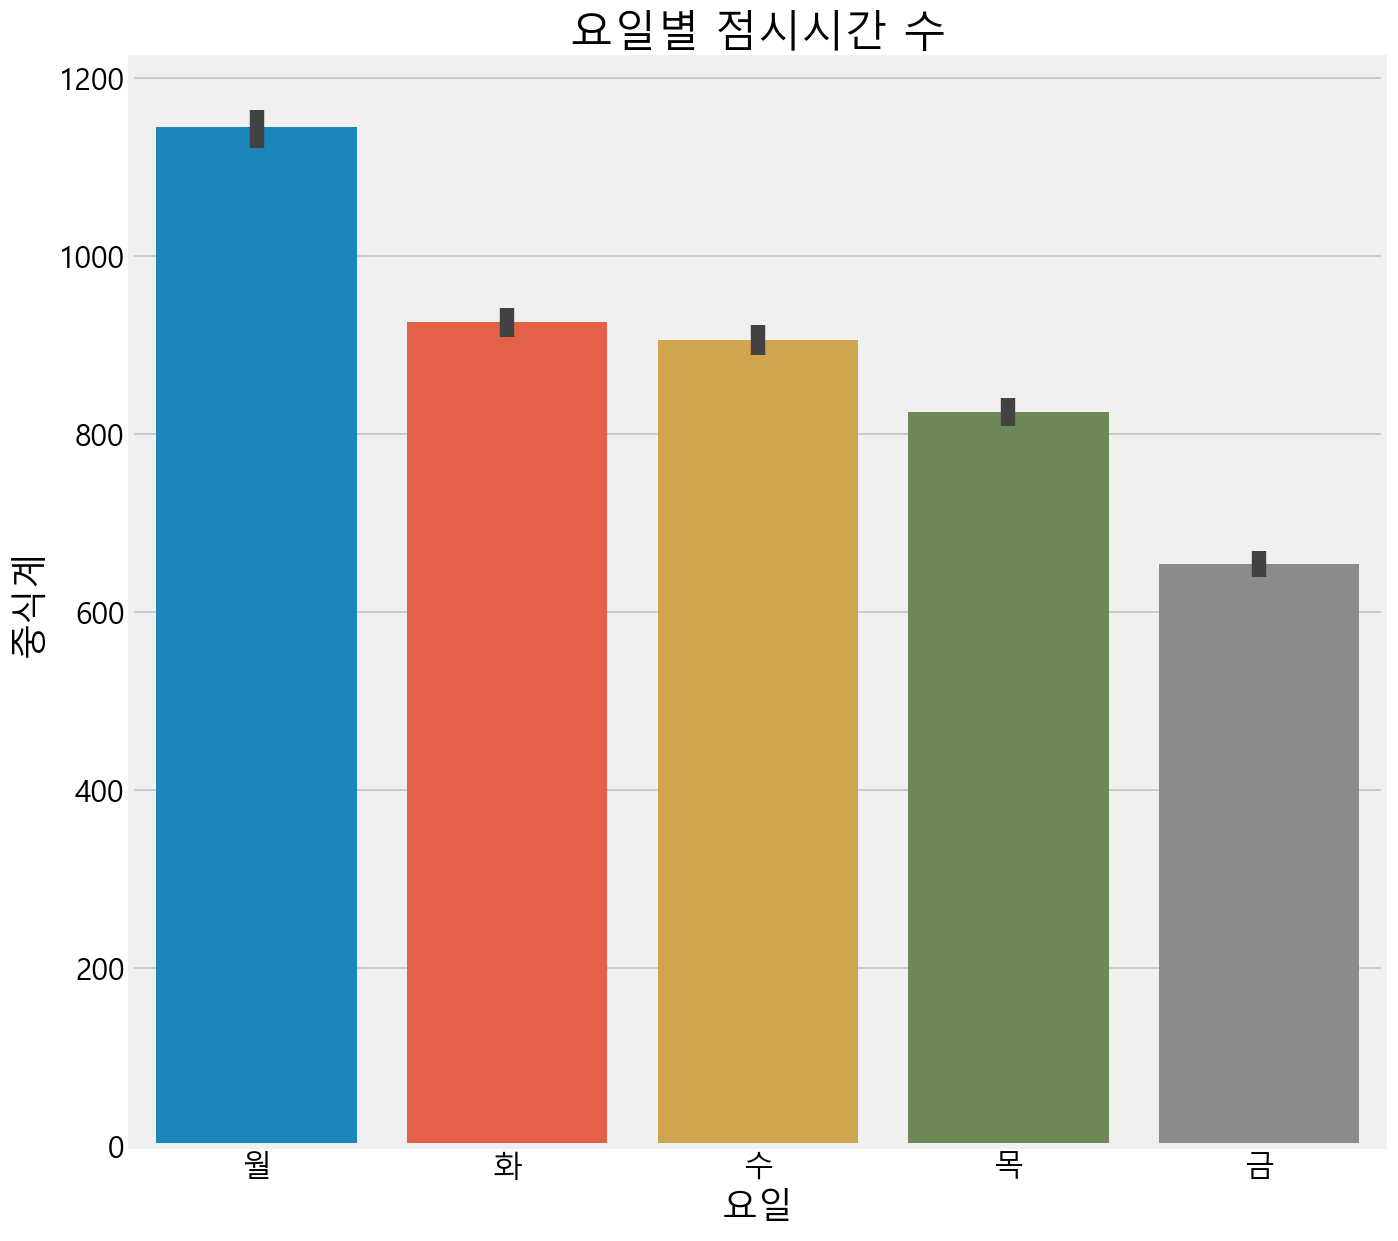

In [10]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="중식계", data=df)
plt.title("요일별 점시시간 수")
plt.show()

#월요일이 가장 많고 금요일로 갈수록 줄어든다.

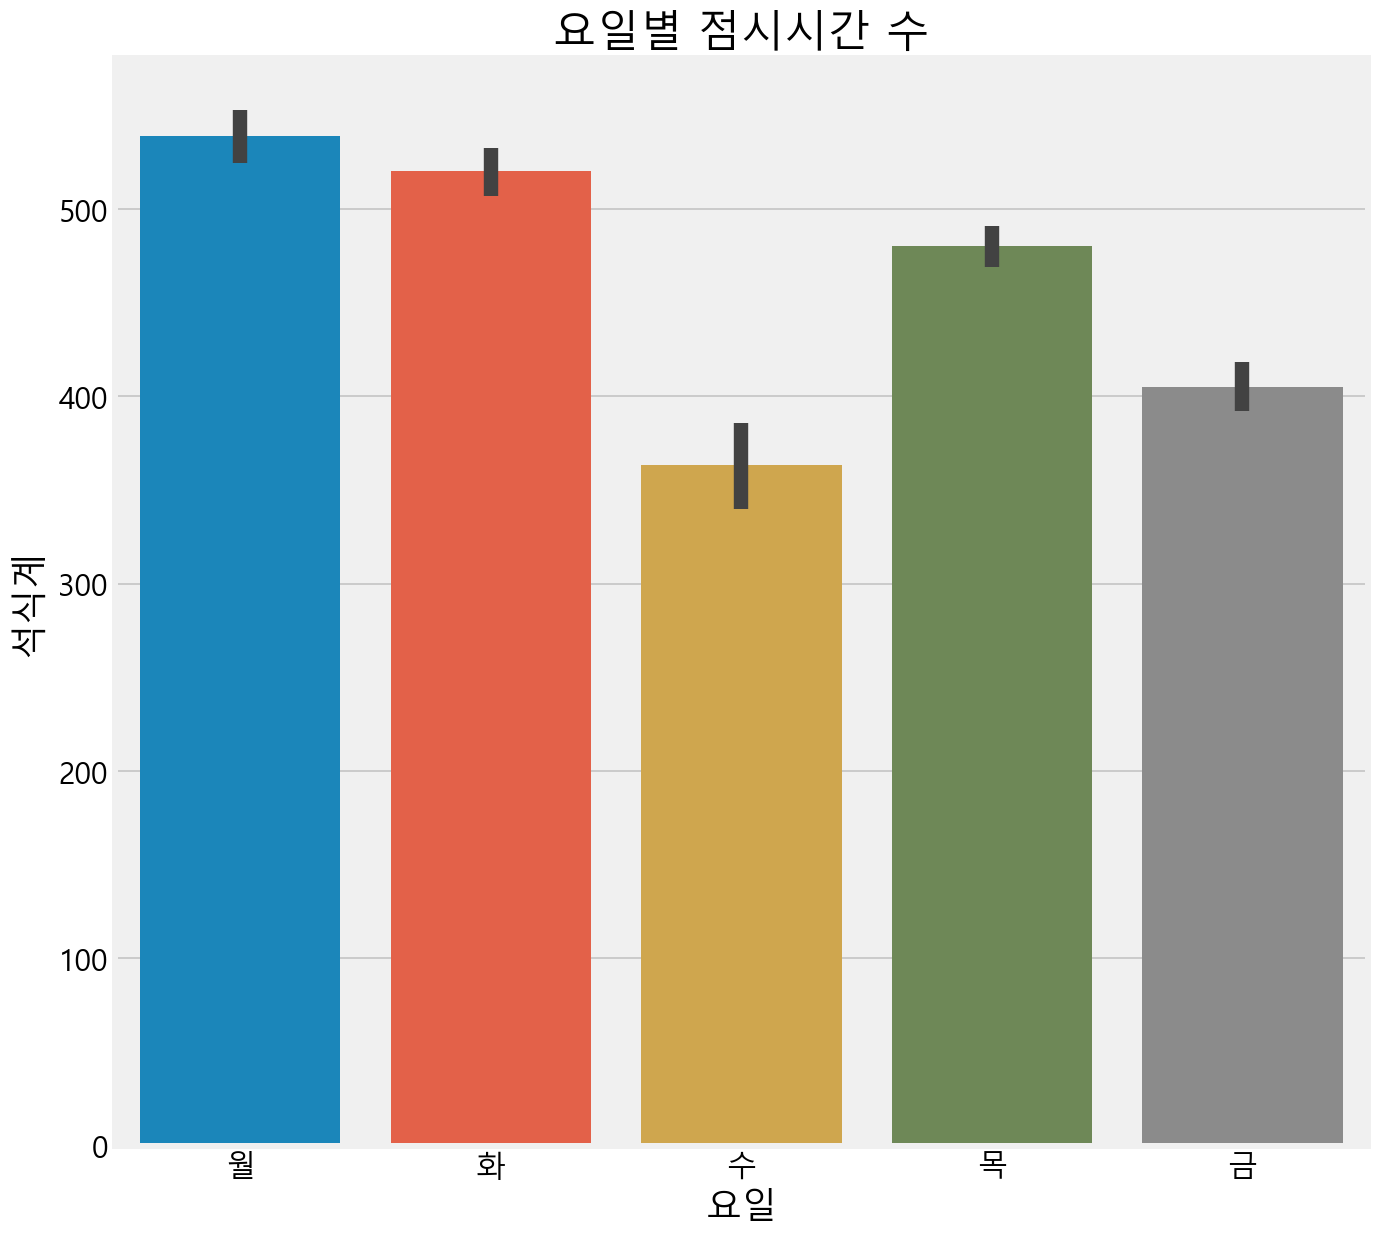

In [11]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="석식계", data=df)
plt.title("요일별 점시시간 수")
plt.show()

#수요일 금요일이 가장 적은데
#그이유는 수요일날 한번 쉬는 의미에서 약속이 많을수 있다 생각.
#금요일 역시 약속이 있어서 나가서 먹을거라 생각
#=> 월,화,목 일 열심히 // 수,금은 좀 힘들어서 쉬는시간 필요하다 생각.

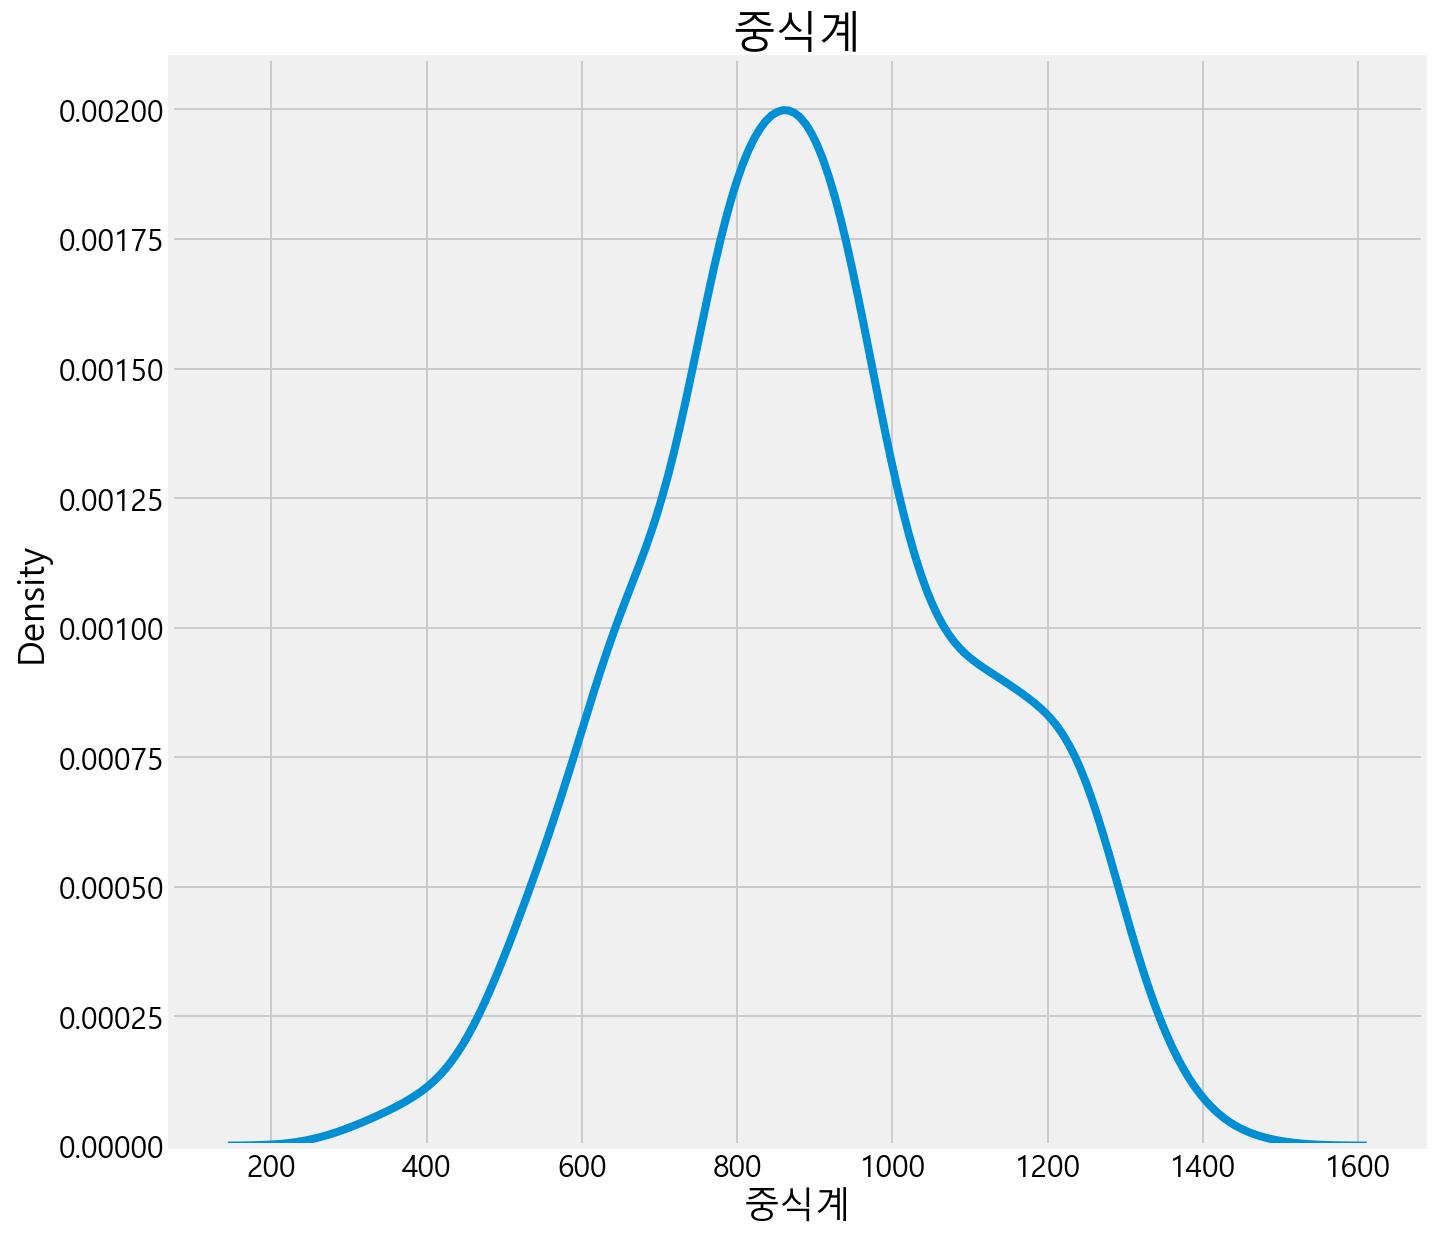

In [12]:
plt.figure(figsize=(10,10))
x = df['중식계']
sns.kdeplot(x)
plt.title("중식계")
plt.show()
# 정규분포를 띈다. 굳이 Min-Max scale 같은걸 이용해줄 필요가없다.

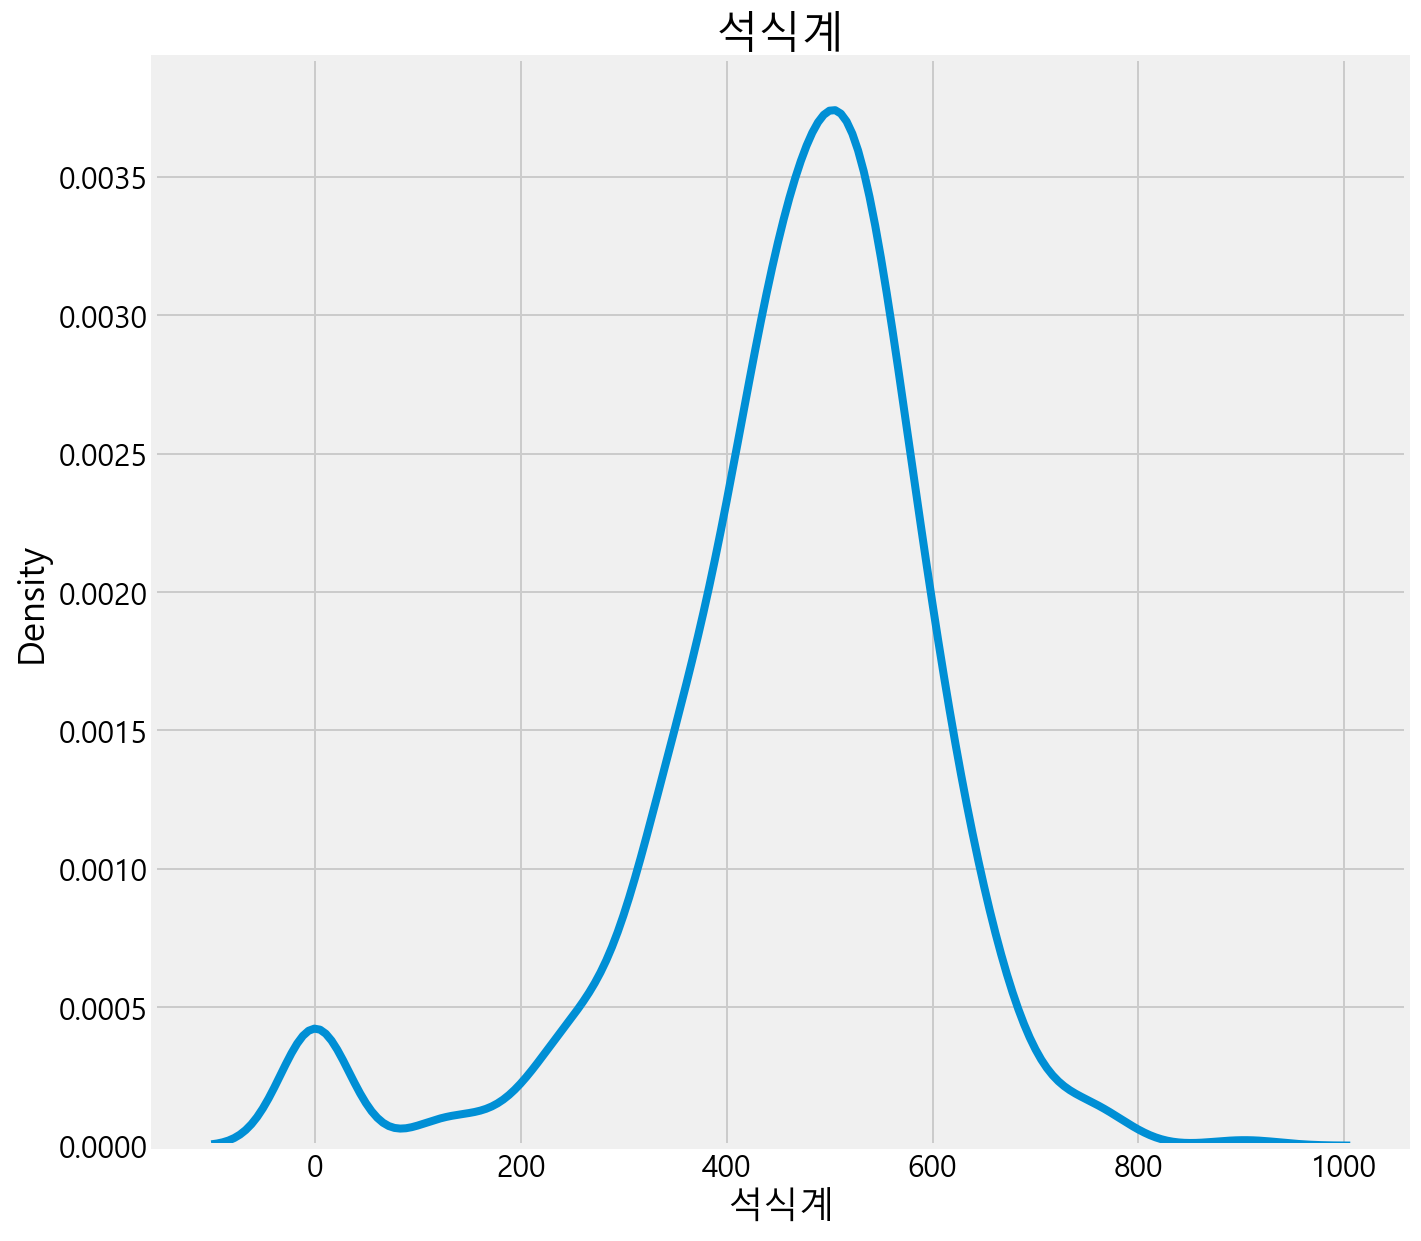

In [13]:
plt.figure(figsize=(10,10))
x = df['석식계']
sns.kdeplot(x)
plt.title("석식계")
plt.show()
# 정규분포를 띈다.

In [14]:
print(df['본사정원수'].max()) #총인원 3305
print('\n')
print(df['중식계'].describe()) #최대 1459
print('\n')
print(df['석식계'].describe()) #최대 905


3305


count    1205.000000
mean      890.334440
std       209.505057
min       296.000000
25%       758.000000
50%       879.000000
75%      1032.000000
max      1459.000000
Name: 중식계, dtype: float64


count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식계, dtype: float64


# 데이터 정리

In [15]:
df.columns = ['date','day','numbers','dayoff','work','outsidework','workfhome','break','lunch','dinner','lunch_t','dinner_t']
df.head(2) #제목이 오타도 날수있어서 영어로바꾸어주었다.

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


## 날짜 정리

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

In [18]:
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date','break'], inplace=True , axis=1) # 아침은 영향이 없을것같으므로 삭제

df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,yearmonth,Month,Date
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,201602,02,01
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,201602,02,02


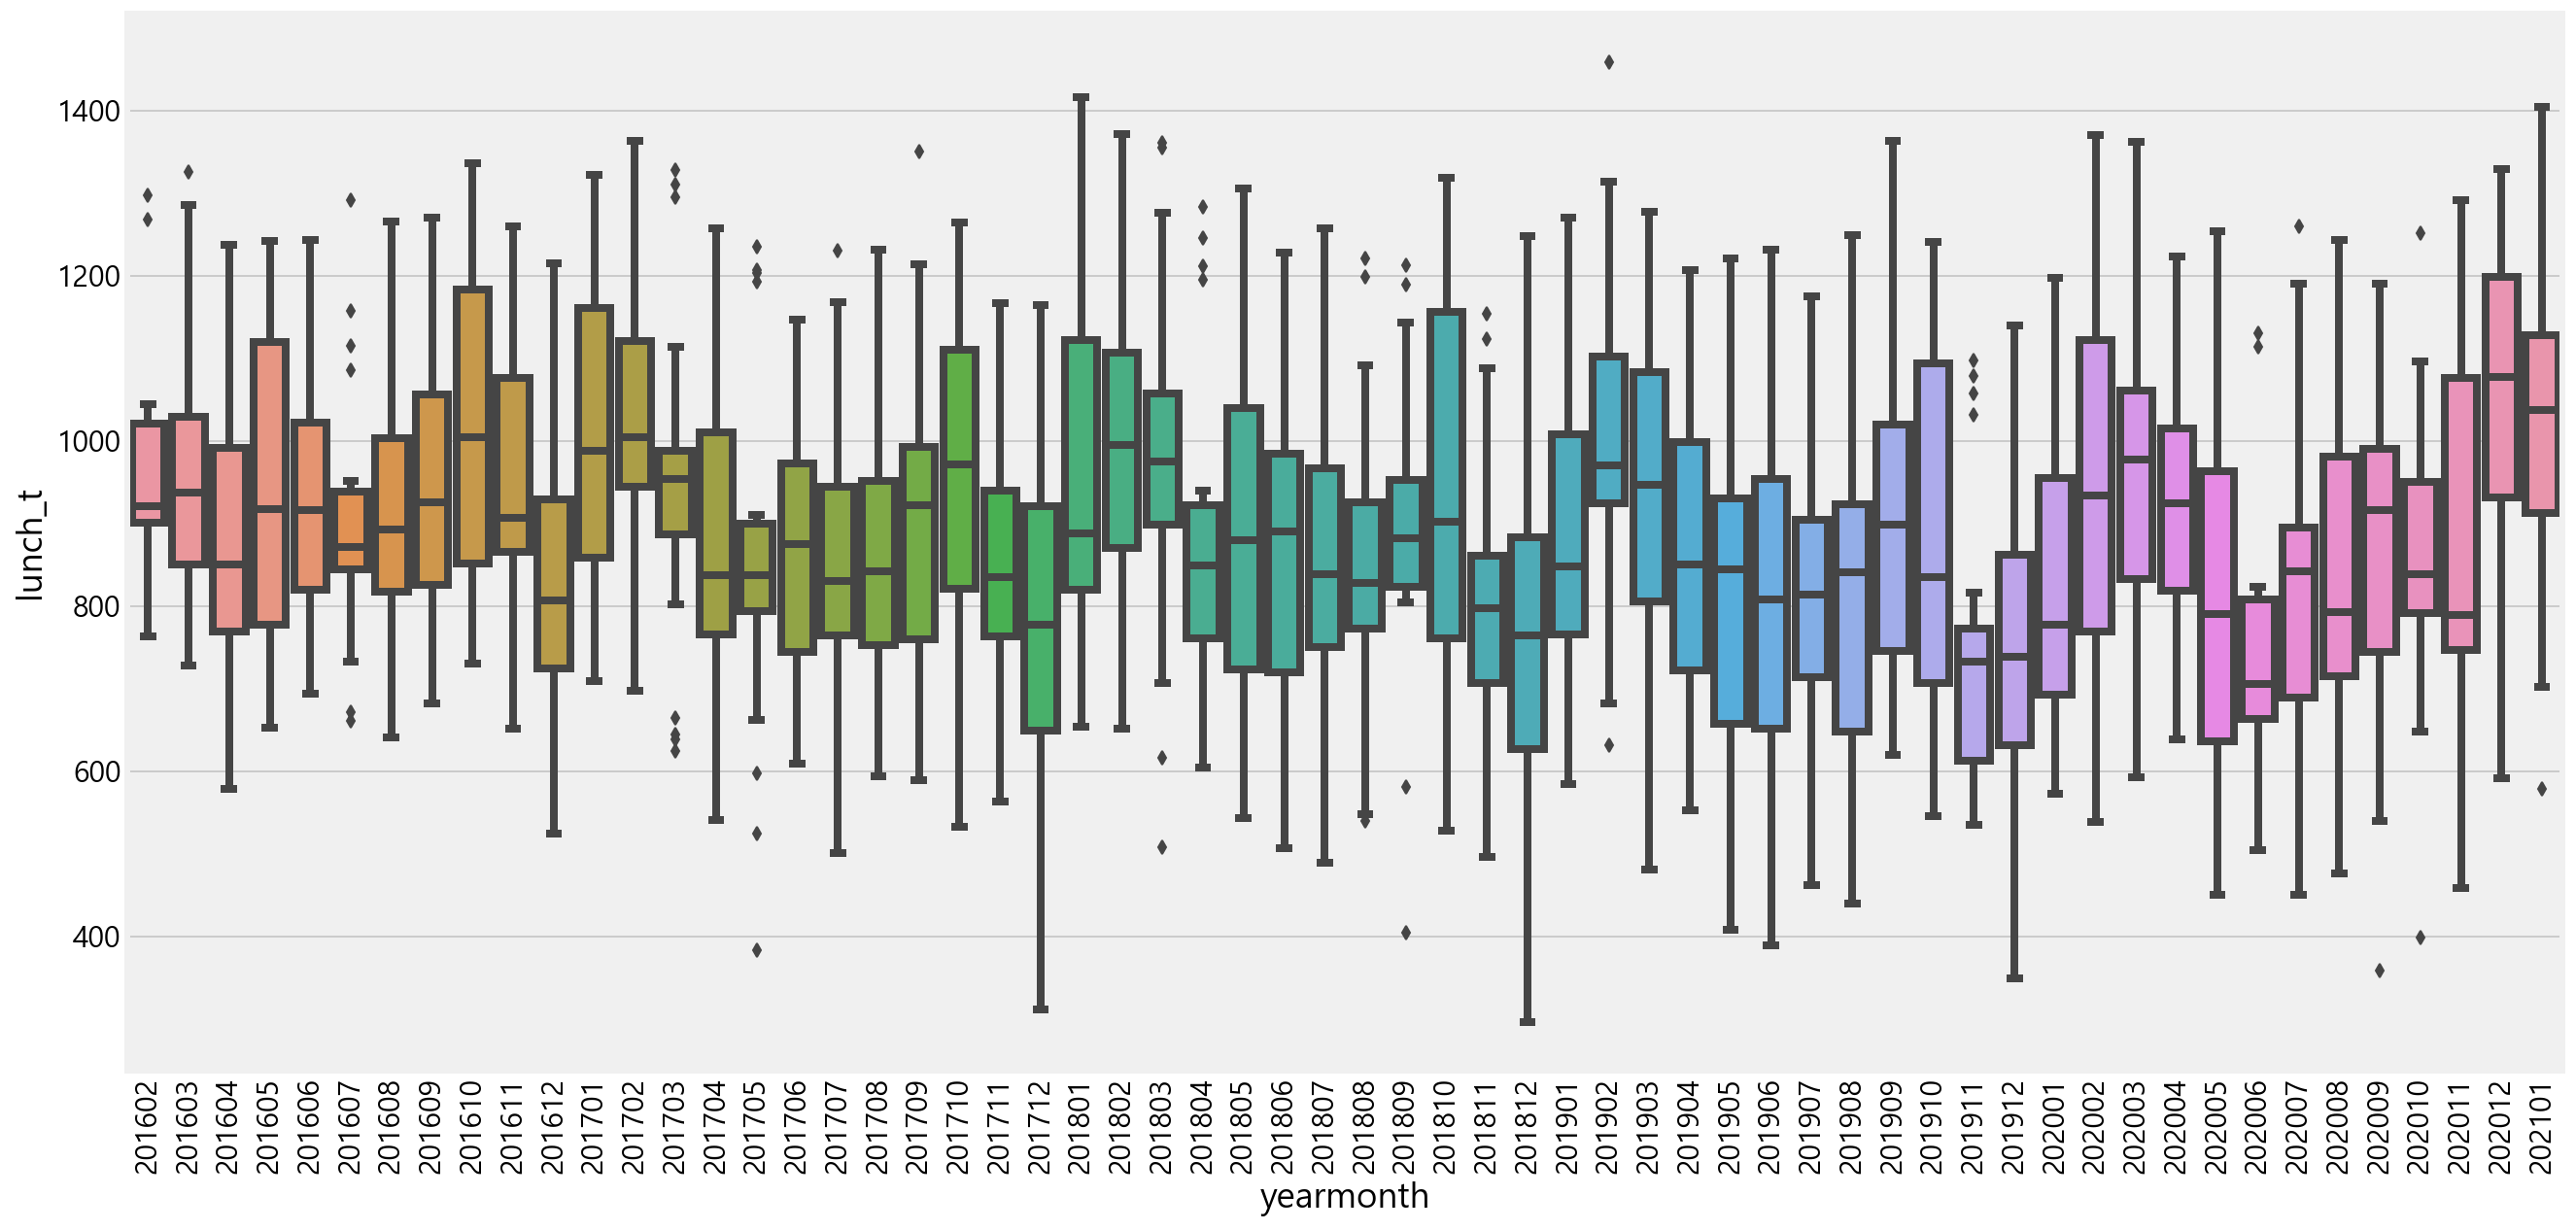

In [19]:
#월별 점심떄 사람수
plt.figure(figsize=(20,10))
rot = sns.boxplot(x='yearmonth',y='lunch_t', data = df)

for item in rot.get_xticklabels():
    item.set_rotation(90)
#2017 년부 12월에 먹는 사람수가 좀 줄어든다.
#연말이라 회식이많은것같다. 그래서 밖에서 사먹고 와서 그런것같다.
#생각보다 코라나로인해 확 줄거나 그런것은 안보이는 것같다.

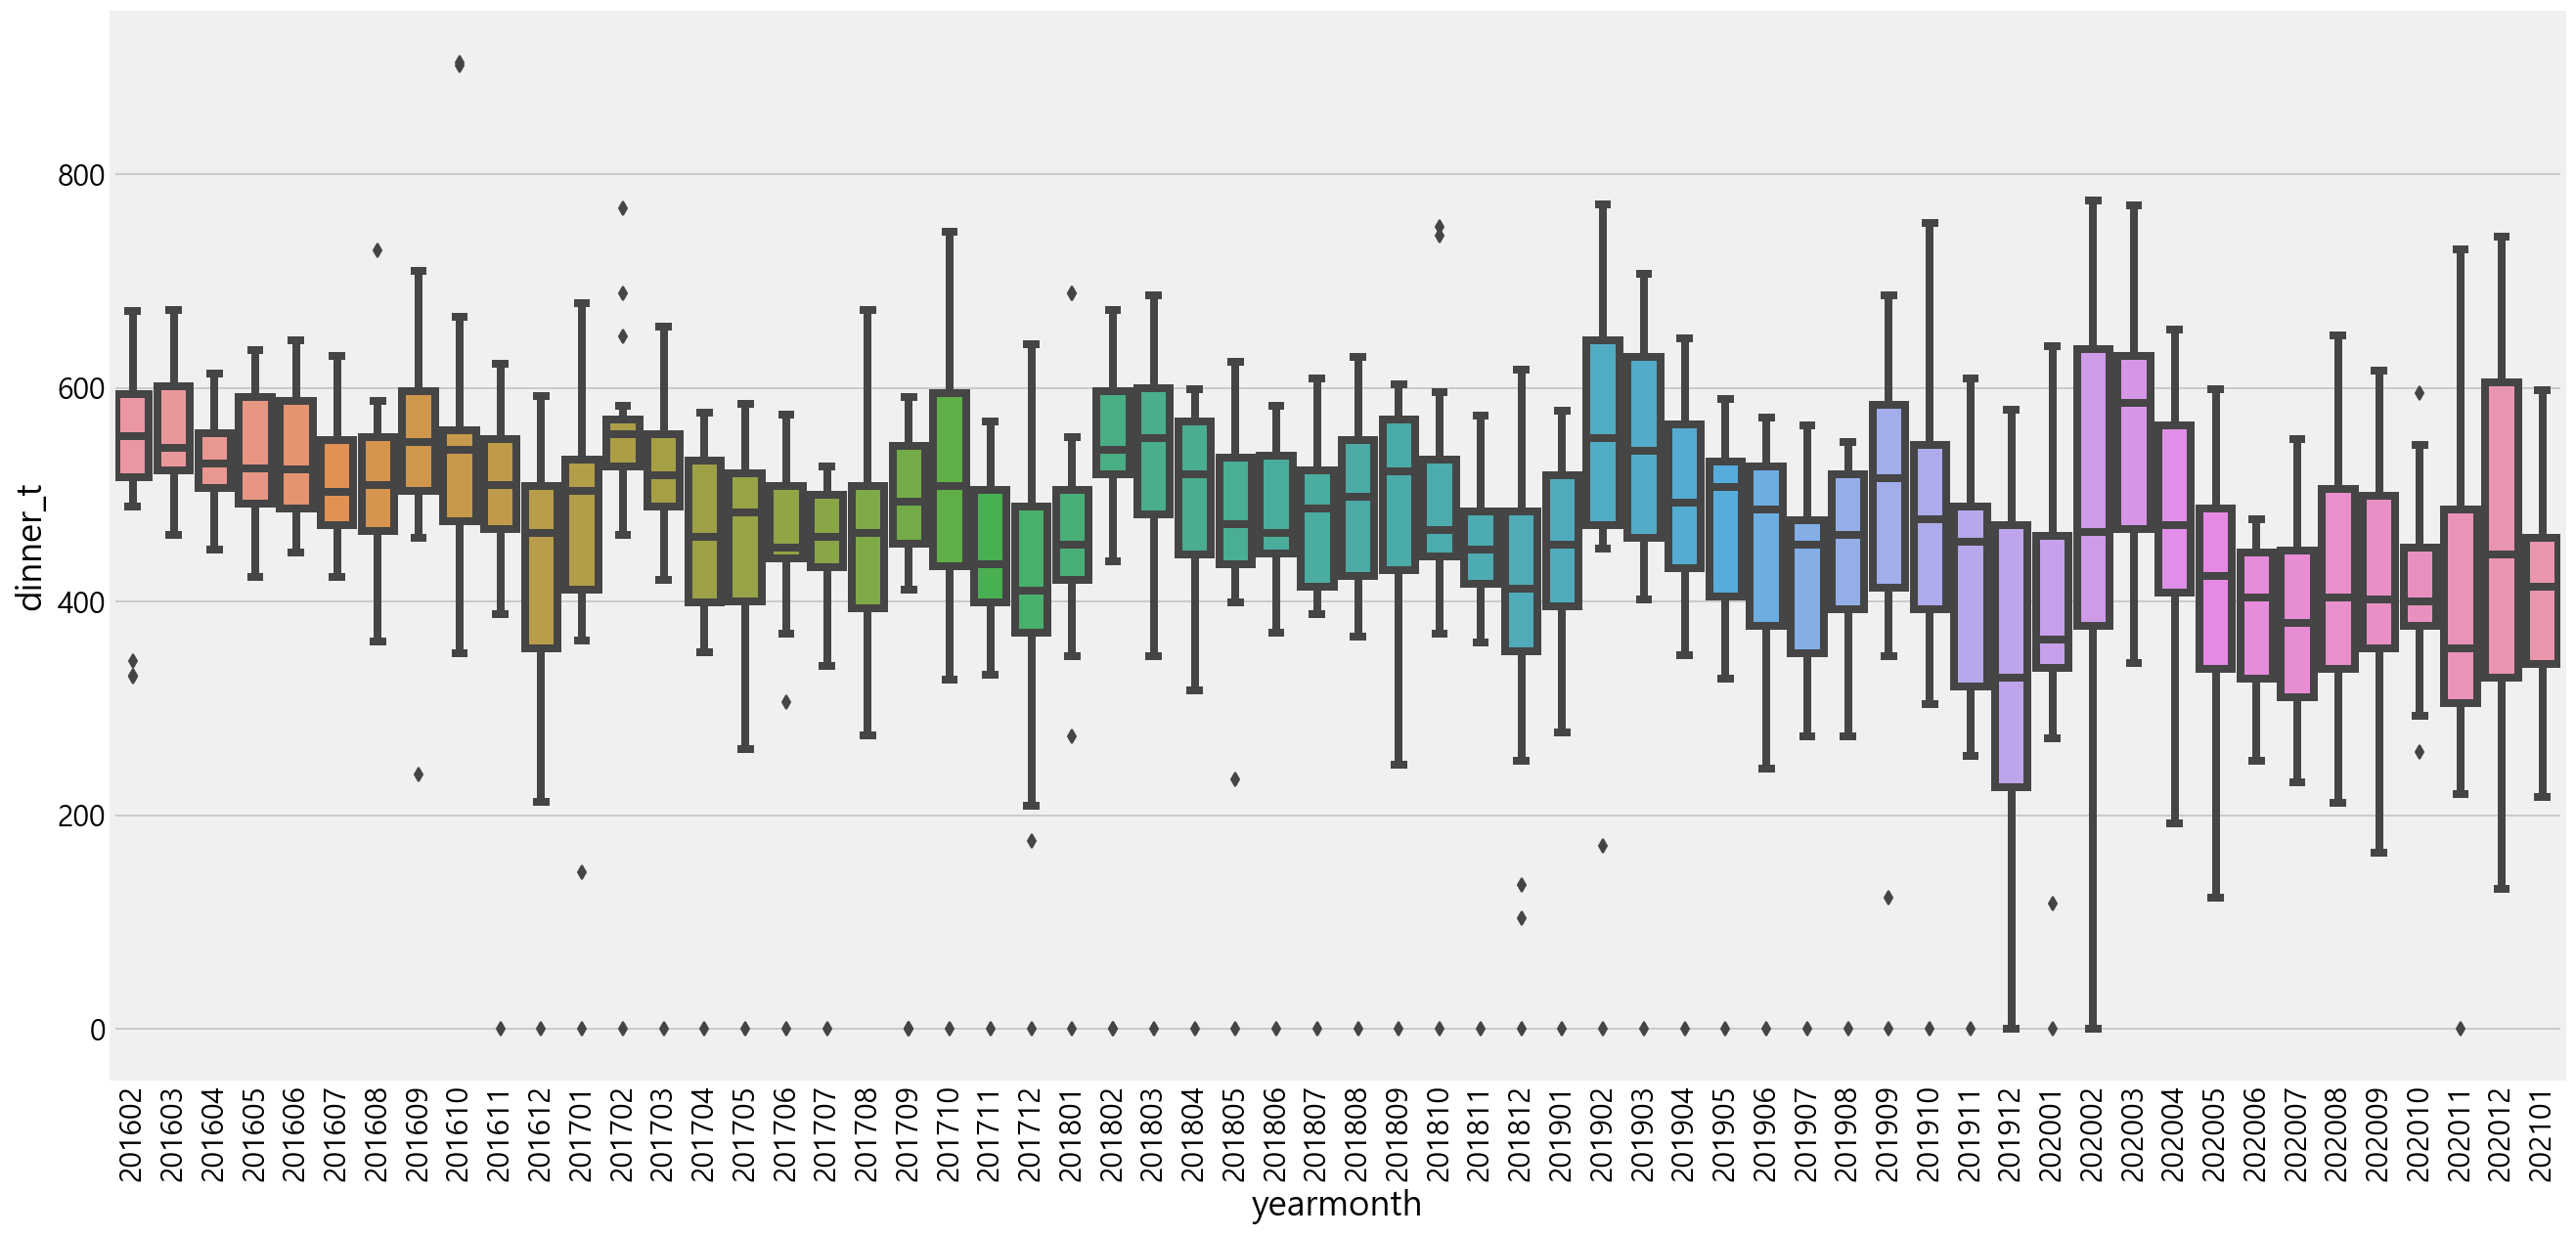

In [20]:
#월별 저녁
plt.figure(figsize=(20,10))
rot = sns.boxplot(x='yearmonth',y='dinner_t', data = df)

for item in rot.get_xticklabels():
    item.set_rotation(90)
    

In [21]:
df.drop('yearmonth', inplace=True , axis=1)

## 메뉴들 나우어 주기

In [22]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch_menu = []

for day in range(len(df)):
    tmp = df.loc[day,'lunch'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp) 

In [23]:
for bob in range(len(df)): # 밥은 큰 차이가 없을것같으므로 쌀밥은 다 밥으로 통일
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [24]:
lunch_menu[:3]

[['밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']]

In [25]:
df['lunch_menu'] = lunch_menu
df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"


In [26]:
# 위에서 언급한 메인, 국, 반찬만 나누어주기

bob=[]
soup=[]
main=[]

for i in range(len(df)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main.append(lunch_menu[i][2])

In [27]:
#누락이 있으면 안되므로 확인해주자

print(len(bob))
print(len(soup))
print(len(main))
print('--')
print(len(df))

1205
1205
1205
--
1205


In [28]:
#확인후에 추가
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [29]:
df.head(2) #잘들어갔다.

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu,bob,soup,main
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김


In [30]:
df['bob'].value_counts() #밥은 딱히 영향이 없을것같다.

밥              1003
콩나물밥             23
카레덮밥             18
나물비빔밥            15
곤드레밥*강된장         12
단호박영양밥           10
김치제육덮밥            8
비빔밥               8
곤드레밥*양념장          8
곤드레밥              8
카레라이스             8
낙지비빔밥             6
짜장덮밥              6
산채비빔밥             5
마파두부덮밥            5
콩나물밥*양념장          5
열무보리비빔밥           4
짜장밥               4
열무비빔밥             3
소불고기덮밥            3
봄나물비빔밥            3
콩나물밥*달래장          2
참치회덮밥             2
<초복특식>            2
단호박카레라이스          2
곤드레밥*간장양념         2
닭살카레라이스           1
새우날치알볶음밥          1
불고기비빔밥            1
건강비빔밥*약고추장        1
전주비빔밥             1
열무보리비빔밥/강된장       1
삼계탕               1
고기듬뿍카레라이스         1
연복풍덮밥             1
김치볶음밥/계란          1
호박된장국             1
불고기덮밥             1
돈육버섯고추장덮밥         1
낙지비빔밥*계란후라이       1
낙지볶음밥             1
봄새싹비빔밥            1
김치볶음밥             1
비빔밥*약고추장          1
산채비빔밥*강된장         1
오곡밥               1
전주비빔밥*약고추장        1
베이컨김치볶음밥          1
버섯영양밥             1
계란채소볶음밥           1


In [31]:
df['soup'].value_counts()

맑은국          46
콩나물국         44
된장찌개         37
어묵국          31
가쯔오장국        28
             ..
전주식콩나물해장국     1
미역오이냉국        1
호박맑은국         1
홍합살무국         1
소고기샤브국        1
Name: soup, Length: 272, dtype: int64

In [32]:
df['main'].value_counts()

오징어볶음         32
닭갈비           30
버섯불고기         29
훈제오리구이        27
돈육굴소스볶음       25
              ..
생선커틀릿          1
데리야끼파닭         1
쇠고기버섯볶음        1
닭데리야끼구이        1
하와이언함박스테이크     1
Name: main, Length: 391, dtype: int64

In [33]:
#가장 많이나오는 탑10

In [34]:
df['soup'].value_counts()[:10]

맑은국      46
콩나물국     44
된장찌개     37
어묵국      31
가쯔오장국    28
배추된장국    28
아욱국      28
근대국      26
꽃게탕      25
순두부찌개    23
Name: soup, dtype: int64

In [35]:
df['main'].value_counts()[:10]

오징어볶음      32
닭갈비        30
버섯불고기      29
훈제오리구이     27
돈육굴소스볶음    25
짬뽕불고기      24
제육볶음       23
등갈비김치찜     21
언양식불고기     20
주꾸미볶음      19
Name: main, dtype: int64

# 저녁도 바꾸어주자

In [36]:
dinner_menu = []
for day in range(len(df)):
    tmp = df.loc[day,'dinner'].split(' ')
    tmp = ' '.join(tmp).split()    

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp) 

In [37]:
df['dinner_menu'] = dinner_menu

In [38]:
len(df['dinner_menu'])

1205

In [39]:
dinner_menu[0:5]

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치']]

In [40]:
print(range(len(df)))
print(range(len(dinner_menu)))

range(0, 1205)
range(0, 1205)


In [41]:
bobd=[]
soupd=[]
maind=[]


for word in  dinner_menu:
    
    
    if len(word) == 0:
        bobd.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soupd.append('None')
        maind.append('None')
    elif '*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의달' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기계발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*자기계발의날*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기개발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')

    else:
        bobd.append(word[0])
        soupd.append(word[1])
        maind.append(word[2])

In [42]:
#다들어왔는지 확인
print(len(dinner_menu))
print(len(bobd))
print(len(soupd))
print(len(maind))

1205
1205
1205
1205


In [43]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [44]:
df['maind'].value_counts()[:10]

None       41
떡볶이        16
닭갈비        16
돈육강정       15
유린기        14
깐풍기        14
돈육장조림      14
돈육굴소스볶음    14
고추잡채*꽃빵    14
탕수어        13
Name: maind, dtype: int64

In [45]:
df['soupd'].value_counts()[:10]

None     41
잔치국수     37
맑은국      33
된장찌개     30
가쯔오장국    29
육개장      29
미소장국     28
부대찌개     25
우동       23
닭개장      23
Name: soupd, dtype: int64

In [46]:
# Lunch Train 완성
#lunch_train
train = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','lunch_t','Month','Date','bob','soup','main']
]


In [47]:
# encoding

train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bob'] =  train['bob'].astype('category')
train['bob'] = train.bob.cat.codes

train['soup'] =  train['soup'].astype('category')
train['soup'] = train.soup.cat.codes

train['main'] =  train['main'].astype('category')
train['main'] = train.main.cat.codes


In [48]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [49]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,Month,Date,bob,soup,main,present
0,3,2601,50,150,238,0.0,1039.0,02,01,22,189,236,2163
1,4,2601,50,173,319,0.0,867.0,02,02,22,28,8,2059
2,2,2601,56,180,111,0.0,1017.0,02,03,49,249,334,2254
3,1,2601,104,220,355,0.0,978.0,02,04,22,149,309,1922
4,0,2601,278,181,34,0.0,925.0,02,05,22,75,106,2108


In [50]:
train.corr() # 밥, 국, 메인 반찬이 약간의 상관관계를 보인다 

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,bob,soup,main,present
day,1.000000,0.004999,-0.210219,-0.447183,0.539062,0.028364,0.584193,-0.051779,0.039582,0.033023,-0.327922
numbers,0.004999,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,0.008470,-0.047180,0.063892,0.409730
dayoff,-0.210219,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,0.008260,-0.033509,0.022062,-0.134040
work,-0.447183,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,0.062909,-0.016055,-0.038943,0.244995
outsidework,0.539062,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,-0.182796,0.078805,0.017750,-0.696646
workfhome,0.028364,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057818,-0.006933,0.029749,0.178831
lunch_t,0.584193,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,-0.041401,0.060575,0.041329,-0.290912
bob,-0.051779,0.008470,0.008260,0.062909,-0.182796,-0.057818,-0.041401,1.000000,-0.094330,-0.021443,0.169876
soup,0.039582,-0.047180,-0.033509,-0.016055,0.078805,-0.006933,0.060575,-0.094330,1.000000,0.030518,-0.087686
main,0.033023,0.063892,0.022062,-0.038943,0.017750,0.029749,0.041329,-0.021443,0.030518,1.000000,0.020313


In [51]:
train.to_csv('enco_train_lunch.csv',index=False)

In [52]:
#train_dinner

In [53]:
train = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','dinner_t','Month','Date','bobd','soupd','maind']
]

In [54]:
#train_dinner 데이터 같은 경우에는 'None' 값이 들어가있어서
#제거 해주는게 가장 좋을것같아서 없애줬다.

In [55]:
train = train[~train['bobd'].str.contains("None", na=False, case=False)]

In [56]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,maind
0,월,2601,50,150,238,0.0,331.0,02,01,쌀밥/잡곡밥,육개장,자반고등어구이
1,화,2601,50,173,319,0.0,560.0,02,02,콩나물밥*양념장,어묵국,유산슬
2,수,2601,56,180,111,0.0,573.0,02,03,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,목,2601,104,220,355,0.0,525.0,02,04,미니김밥*겨자장,우동,멕시칸샐러드
4,금,2601,278,181,34,0.0,330.0,02,05,쌀밥/잡곡밥,차돌박이찌개,닭갈비


In [57]:
# encoding

train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bobd'] =  train['bobd'].astype('category')
train['bobd'] = train.bobd.cat.codes

train['soupd'] =  train['soupd'].astype('category')
train['soupd'] = train.soupd.cat.codes

train['maind'] =  train['maind'].astype('category')
train['maind'] = train.maind.cat.codes

In [58]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [59]:
train.corr() 

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,bobd,soupd,maind,present
day,1.000000,0.000103,-0.217477,-0.448551,0.550560,0.027610,0.367746,-0.031836,-0.049255,-0.027405,-0.339011
numbers,0.000103,1.000000,0.244031,-0.060470,0.148530,0.459453,-0.236324,0.233612,-0.040918,-0.016451,0.414056
dayoff,-0.217477,0.244031,1.000000,-0.267355,-0.247829,0.063480,-0.439108,0.095060,0.049480,-0.033118,-0.123294
work,-0.448551,-0.060470,-0.267355,1.000000,-0.304423,-0.352901,-0.188894,-0.134922,-0.012290,0.051699,0.239584
outsidework,0.550560,0.148530,-0.247829,-0.304423,1.000000,0.144985,0.577148,0.002529,-0.016797,0.047346,-0.689208
workfhome,0.027610,0.459453,0.063480,-0.352901,0.144985,1.000000,-0.130644,0.357199,-0.055294,-0.035213,0.200098
dinner_t,0.367746,-0.236324,-0.439108,-0.188894,0.577148,-0.130644,1.000000,-0.131424,0.028299,0.048750,-0.445447
bobd,-0.031836,0.233612,0.095060,-0.134922,0.002529,0.357199,-0.131424,1.000000,-0.039370,-0.085033,0.127680
soupd,-0.049255,-0.040918,0.049480,-0.012290,-0.016797,-0.055294,0.028299,-0.039370,1.000000,-0.000109,-0.038519
maind,-0.027405,-0.016451,-0.033118,0.051699,0.047346,-0.035213,0.048750,-0.085033,-0.000109,1.000000,-0.048079


In [60]:
# y=train['dinner_t']
# x=train.drop('dinner_t',axis=1)

# lm=sm.OLS(y, x)
# results=lm.fit()
# results.summary()

In [61]:
train.to_csv('enco_train_dinner.csv',index=False)

# 2)test_lunch,test_dinner

    -위에와 똑같으니 설명은 축약

In [62]:
df = pd.read_csv('test.csv')

In [63]:
df.columns = ['date','day','numbers','dayoff','work','outsidework','workfhome','break','lunch','dinner']
df.head()

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [64]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')
df.head()

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,yearmonth
0,0127,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,202101
1,0128,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,202101
2,0129,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,202101
3,0201,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,202102
4,0202,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,202102


In [65]:
df.drop('yearmonth', inplace=True , axis=1)

In [66]:
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date','break'], inplace=True , axis=1)

In [67]:
lunch_menu = []

for day in range(len(df)):
    tmp = df.loc[day,'lunch'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp) 

In [68]:
df['lunch_menu'] = lunch_menu

In [69]:
for bob in range(len(df)):
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [70]:
bob=[]
soup=[]
main=[]

for i in range(len(df)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main.append(lunch_menu[i][2])

In [71]:
print(len(bob))
print(len(soup))
print(len(main))
print('--')
print(len(df))

50
50
50
--
50


In [72]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [73]:
# 저녁도 바꾸어주자
dinner_menu = []
for day in range(len(df)):
    tmp = df.loc[day,'dinner'].split(' ') 
    tmp = ' '.join(tmp).split()   
    
    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp) 

In [74]:
df['dinner_menu'] = dinner_menu

In [75]:
len(dinner_menu)

50

In [76]:
bobd=[]
soupd=[]
maind=[]

for i in range(len(df)):
    if dinner_menu[i][0]:
        bobd.append(dinner_menu[i][0])
    if dinner_menu[i][1]:
        soupd.append(dinner_menu[i][1])
    if dinner_menu[i][2]:
        maind.append(dinner_menu[i][2])

In [77]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [78]:
#lunch
test = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','Month','Date','bob','soup','main']
]

In [79]:
# encoding

test['day'] =  test['day'].astype('category')
test['day'] = test.day.cat.codes


test['bob'] =  test['bob'].astype('category')
test['bob'] = test.bob.cat.codes

test['soup'] =  test['soup'].astype('category')
test['soup'] = test.soup.cat.codes

test['main'] =  test['main'].astype('category')
test['main'] = test.main.cat.codes


In [80]:
test['present'] = test['numbers']-test['dayoff']-test['work']-test['outsidework']

In [81]:
test.head()

,day,numbers,dayoff,work,outsidework,workfhome,Month,Date,bob,soup,main,present
0,2,2983,88,182,5,358.0,01,27,0,9,15,2708
1,1,2983,104,212,409,348.0,01,28,0,35,35,2258
2,0,2983,270,249,0,294.0,01,29,0,41,29,2464
3,3,2924,108,154,538,322.0,02,01,0,19,33,2124
4,4,2924,62,186,455,314.0,02,02,0,21,7,2221


In [82]:
test.to_csv('enco_test_lunch.csv', index=False)

In [83]:
#dinner

test = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','Month','Date', 'bobd','soupd','maind']
]

In [84]:
# encoding

test['day'] =  test['day'].astype('category')
test['day'] = test.day.cat.codes


test['bobd'] =  test['bobd'].astype('category')
test['bobd'] = test.bobd.cat.codes

test['soupd'] =  test['soupd'].astype('category')
test['soupd'] = test.soupd.cat.codes

test['maind'] =  test['maind'].astype('category')
test['maind'] = test.maind.cat.codes


In [85]:
test['present'] = test['numbers']-test['dayoff']-test['work']-test['outsidework']

In [86]:
test.to_csv('enco_test_dinner.csv', index=False)

# 다합쳐논 데이터 생성

In [87]:
df = pd.read_csv('train.csv')

In [88]:
df.columns = ['date','day','numbers','dayoff','work','outsidework','workfhome','break','lunch','dinner','lunch_t','dinner_t']

df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date','break'], inplace=True , axis=1)


In [89]:
df.drop('yearmonth', inplace=True , axis=1)

In [90]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch_menu = []

for day in range(len(df)):
    tmp = df.loc[day,'lunch'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp) 

In [91]:
for bob in range(len(df)): # 밥은 큰 차이가 없을것같으므로 쌀밥은 다 밥으로 통일
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [92]:
df['lunch_menu'] = lunch_menu

In [93]:
bob=[]
soup=[]
main=[]

for i in range(len(df)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main.append(lunch_menu[i][2])

In [94]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [95]:
dinner_menu = []
for day in range(len(df)):
    tmp = df.loc[day,'dinner'].split(' ')
    tmp = ' '.join(tmp).split()    

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp) 

In [96]:
df['dinner_menu'] = dinner_menu

In [97]:
bobd=[]
soupd=[]
maind=[]


for word in  dinner_menu:
    
    
    if len(word) == 0:
        bobd.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soupd.append('None')
        maind.append('None')
    elif '*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의달' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기계발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*자기계발의날*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기개발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')

    else:
        bobd.append(word[0])
        soupd.append(word[1])
        maind.append(word[2])

In [98]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [99]:
train = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','lunch_t','dinner_t','Month','Date','bob','soup','main','bobd','soupd','maind']
]


In [100]:
# encoding


train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bob'] =  train['bob'].astype('category')
train['bob'] = train.bob.cat.codes

train['soup'] =  train['soup'].astype('category')
train['soup'] = train.soup.cat.codes

train['main'] =  train['main'].astype('category')
train['main'] = train.main.cat.codes


train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bobd'] =  train['bobd'].astype('category')
train['bobd'] = train.bobd.cat.codes

train['soupd'] =  train['soupd'].astype('category')
train['soupd'] = train.soupd.cat.codes

train['maind'] =  train['maind'].astype('category')
train['maind'] = train.maind.cat.codes

In [101]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [102]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,dinner_t,Month,Date,bob,soup,main,bobd,soupd,maind,present
0,3,2601,50,150,238,0.0,1039.0,331.0,02,01,22,189,236,66,224,341,2163
1,4,2601,50,173,319,0.0,867.0,560.0,02,02,22,28,8,110,183,335,2059
2,2,2601,56,180,111,0.0,1017.0,573.0,02,03,49,249,334,66,244,430,2254
3,1,2601,104,220,355,0.0,978.0,525.0,02,04,22,149,309,35,213,172,1922
4,0,2601,278,181,34,0.0,925.0,330.0,02,05,22,75,106,66,240,92,2108


In [103]:
train.to_csv('enco_train_origin.csv',index=False)

# test

In [104]:
df = pd.read_csv('test.csv')

In [105]:
df.columns = ['date','day','numbers','dayoff','work','outsidework','workfhome','break','lunch','dinner']

In [106]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

In [107]:
df.drop('yearmonth', inplace=True , axis=1)

In [108]:
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date','break'], inplace=True , axis=1)

In [109]:
lunch_menu = []

for day in range(len(df)):
    tmp = df.loc[day,'lunch'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp) 

In [110]:
df['lunch_menu'] = lunch_menu

In [111]:
for bob in range(len(df)):
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [112]:
bob=[]
soup=[]
main=[]

for i in range(len(df)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main.append(lunch_menu[i][2])

In [113]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [114]:
# 저녁도 바꾸어주자
dinner_menu = []
for day in range(len(df)):
    tmp = df.loc[day,'dinner'].split(' ') 
    tmp = ' '.join(tmp).split()   
    
    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp) 

In [115]:
df['dinner_menu'] = dinner_menu

In [116]:
bobd=[]
soupd=[]
maind=[]

for i in range(len(df)):
    if dinner_menu[i][0]:
        bobd.append(dinner_menu[i][0])
    if dinner_menu[i][1]:
        soupd.append(dinner_menu[i][1])
    if dinner_menu[i][2]:
        maind.append(dinner_menu[i][2])

In [117]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [118]:
test = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','Month','Date','bob','soup','main','bobd','soupd','maind']
]

In [119]:
# encoding

test['day'] =  test['day'].astype('category')
test['day'] = test.day.cat.codes


test['bob'] =  test['bob'].astype('category')
test['bob'] = test.bob.cat.codes

test['soup'] =  test['soup'].astype('category')
test['soup'] = test.soup.cat.codes

test['main'] =  test['main'].astype('category')
test['main'] = test.main.cat.codes


test['day'] =  test['day'].astype('category')
test['day'] = test.day.cat.codes


test['bobd'] =  test['bobd'].astype('category')
test['bobd'] = test.bobd.cat.codes

test['soupd'] =  test['soupd'].astype('category')
test['soupd'] = test.soupd.cat.codes

test['maind'] =  test['maind'].astype('category')
test['maind'] = test.maind.cat.codes

In [120]:
test['present'] = test['numbers']-test['dayoff']-test['work']-test['outsidework']

In [121]:
test.to_csv('enco_test_origin.csv', index=False)

In [122]:
test.head()

,day,numbers,dayoff,work,outsidework,workfhome,Month,Date,bob,soup,main,bobd,soupd,maind,present
0,2,2983,88,182,5,358.0,01,27,0,9,15,14,32,25,2708
1,1,2983,104,212,409,348.0,01,28,0,35,35,12,34,35,2258
2,0,2983,270,249,0,294.0,01,29,0,41,29,14,14,44,2464
3,3,2924,108,154,538,322.0,02,01,0,19,33,14,10,9,2124
4,4,2924,62,186,455,314.0,02,02,0,21,7,14,19,26,2221


# 학습

## 점심 메뉴로만 구성해서 저녁까지 예측

    - 과연 점심과 저녁 관의 얼마나 관계가있는지 알기위해 저녁 메뉴는 추가하지 않은상태로 학슥 - model1
    - 그리고 나서 점심메뉴따로 저녁메뉴 따로해서 예측 - model2

In [123]:
# Lunch Machine Learning

train = pd.read_csv('enco_train_origin.csv')
test = pd.read_csv('enco_test_origin.csv')

In [124]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,dinner_t,Month,Date,bob,soup,main,bobd,soupd,maind,present
0,3,2601,50,150,238,0.0,1039.0,331.0,2,1,22,189,236,66,224,341,2163
1,4,2601,50,173,319,0.0,867.0,560.0,2,2,22,28,8,110,183,335,2059
2,2,2601,56,180,111,0.0,1017.0,573.0,2,3,49,249,334,66,244,430,2254
3,1,2601,104,220,355,0.0,978.0,525.0,2,4,22,149,309,35,213,172,1922
4,0,2601,278,181,34,0.0,925.0,330.0,2,5,22,75,106,66,240,92,2108


In [125]:
test.head()

,day,numbers,dayoff,work,outsidework,workfhome,Month,Date,bob,soup,main,bobd,soupd,maind,present
0,2,2983,88,182,5,358.0,1,27,0,9,15,14,32,25,2708
1,1,2983,104,212,409,348.0,1,28,0,35,35,12,34,35,2258
2,0,2983,270,249,0,294.0,1,29,0,41,29,14,14,44,2464
3,3,2924,108,154,538,322.0,2,1,0,19,33,14,10,9,2124
4,4,2924,62,186,455,314.0,2,2,0,21,7,14,19,26,2221


In [126]:
x_train = train[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]
y_train = train['lunch_t'] 

In [127]:
x_test = test[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]

In [128]:
import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [129]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [130]:
y_pred = grid_search.predict(x_test)

In [131]:
y_pred

array([1094.4375 , 1050.659  ,  697.4613 , 1358.0463 ,  997.43365,
       1001.03296,  979.05365,  710.2952 , 1355.1733 , 1094.7499 ,
        761.5722 , 1395.8324 , 1198.562  , 1129.092  ,  997.4363 ,
        732.23474, 1302.4109 , 1108.5001 ,  876.024  ,  866.6386 ,
        666.00336, 1226.2607 , 1083.9829 , 1060.9589 ,  790.11365,
       1460.5614 , 1307.8004 , 1007.73553, 1065.0653 ,  832.28595,
       1383.7144 , 1199.0187 , 1154.6815 , 1073.5918 ,  724.0693 ,
       1392.7854 , 1121.0884 ,  957.4054 ,  933.49945,  656.76447,
       1334.7421 , 1079.5405 , 1078.4767 ,  935.6774 ,  708.30035,
       1346.4854 , 1157.0953 , 1044.1443 ,  919.244  ,  703.1066 ],
      dtype=float32)

In [132]:
#석식
x_train = train[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]
y_train = train['dinner_t'] 

In [133]:
x_test = test[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]

In [134]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [135]:
y_pred_dinner = grid_search.predict(x_test)

In [136]:
y_pred_dinner

array([217.12686, 448.2368 , 318.44052, 624.3619 , 546.7752 , 493.5176 ,
       507.9268 , 393.78094, 679.8953 , 592.4824 , 119.74602, 755.50995,
       665.77734, 398.42084, 547.7014 , 413.04733, 688.56775, 642.8237 ,
       301.46643, 428.56912, 227.31271, 697.8895 , 479.42105, 553.3889 ,
       404.29813, 818.9788 , 738.0157 , 437.17883, 551.9948 , 381.08893,
       687.5326 , 619.55554, 433.31073, 499.13068, 342.0743 , 692.178  ,
       629.0179 , 428.46405, 464.52783, 303.1422 , 667.1533 , 716.30743,
       414.71802, 476.97278, 346.22852, 632.23126, 638.81244, 448.8903 ,
       470.44373, 328.34705], dtype=float32)

In [137]:
submit = pd.read_csv('sample_submission.csv')

In [138]:
submit['중식계'] = y_pred

In [139]:
submit['석식계'] = y_pred_dinner

In [140]:
submit.to_csv('submit_final2.csv.csv', index=False)

In [141]:
submit

,일자,중식계,석식계
0,2021-01-27,1094.437500,217.126862
1,2021-01-28,1050.659058,448.236786
2,2021-01-29,697.461304,318.440521
3,2021-02-01,1358.046265,624.361877
4,2021-02-02,997.433655,546.775208
5,2021-02-03,1001.032959,493.517609
6,2021-02-04,979.053650,507.926788
7,2021-02-05,710.295227,393.780945
8,2021-02-08,1355.173340,679.895325
9,2021-02-09,1094.749878,592.482422


## Public결과 나쁘지않았다.
    -여기서 처음에 가설 즉, 오는 사람은 계속 온다 하지만 정말 음식이 별로라면 가지 않고 나가서 먹을
    -거라는것을 알수있다. 그리고, 국, 메인반찬 까지만보고 나머지는 거의 영향을 주지 않는다고 생각
    -그래서 점심/저녁 메뉴를 나누어서 다시 예측

# 점심 저녁 메뉴  별 예측하기

In [142]:
#중식계
train = pd.read_csv('enco_train_lunch.csv')
test = pd.read_csv('enco_test_lunch.csv')

In [143]:
x_train = train[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]
y_train = train['lunch_t'] 
x_test = test[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bob','soup','main']]

In [144]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [145]:
y_pred2 = grid_search.predict(x_test)

In [146]:
# 석식계
train = pd.read_csv('enco_train_dinner.csv')
test = pd.read_csv('enco_test_dinner.csv')

In [147]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,maind,present
0,3,2601,50,150,238,0.0,331.0,2,1,65,223,340,2163
1,4,2601,50,173,319,0.0,560.0,2,2,109,182,334,2059
2,2,2601,56,180,111,0.0,573.0,2,3,65,243,429,2254
3,1,2601,104,220,355,0.0,525.0,2,4,34,212,171,1922
4,0,2601,278,181,34,0.0,330.0,2,5,65,239,91,2108


In [148]:
x_train = train[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bobd','soupd','maind']]
y_train = train['dinner_t'] 

In [149]:
x_test = test[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month','Date','bobd','soupd','maind']]

In [150]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [151]:
y_pred_dinner2 = grid_search.predict(x_test)

In [152]:
submit = pd.read_csv('sample_submission.csv')

In [153]:
submit['중식계'] = y_pred2

In [154]:
submit['석식계'] = y_pred_dinner2

In [155]:
submit

,일자,중식계,석식계
0,2021-01-27,1094.437500,420.320465
1,2021-01-28,1050.659058,465.205414
2,2021-01-29,697.461304,289.036316
3,2021-02-01,1358.046265,615.862976
4,2021-02-02,997.433655,487.579834
5,2021-02-03,1001.032959,412.635010
6,2021-02-04,979.053650,483.790771
7,2021-02-05,710.295227,375.334839
8,2021-02-08,1355.173340,657.330688
9,2021-02-09,1094.749878,540.873474


In [156]:
submit.to_csv('final_w_new.csv', index=False)